In [21]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from math import sqrt  # for root mean-squared error calculation

import seaborn as sns  # pretty plotting, including heat map


import os
import time
from IPython.display import display

from sklearn import preprocessing


Check current dirctory

In [2]:
train = pd.read_csv('train.csv')
# check the pandas DataFrame object boston_input
print(len(train))
print('\ndataset dimensions', train.shape)
#train.head()


42000

dataset dimensions (42000, 785)


In [3]:
test = pd.read_csv('test.csv')
# check the pandas DataFrame object boston_input
print(len(test))
print('\ndataset dimensions', test.shape)
#test.head()

28000

dataset dimensions (28000, 784)


In [10]:
y_train=train["label"]
X_train=train.drop(labels=["label"], axis=1)


Initial Random Forest Classifier

In [12]:
clf = RandomForestClassifier(random_state=1234,n_jobs=-1,n_estimators=784)
start_time = time.time()
clf.fit(X_train, y_train)
print("Time:" , time.time()-start_time)

Time: 108.82968664169312


In [14]:
predictions = clf.predict(test)
print(predictions[1:50])

[0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5 5
 1 6 7 7 4 9 8 7 8 2 6 7]


In [15]:
pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
              "Lable":predictions}).to_csv("rf_kaggle_submission.csv",
                                          index=False,
                                          header=True)

Set up the Search Grid

In [16]:
criterion = ['entropy','gini']
n_estimators =[100,150,200]
random_grid={'criterion':criterion, 'n_estimators':n_estimators}


In [24]:
rf_random=RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                             n_iter=10, cv=2, verbose=2, random_state=12,n_jobs=-1)

#feed random search
rf_random.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.1min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=784, n_jobs=-1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['entropy', 'gini'], 'n_estimators': [100, 150, 200]},
          pre_dispatch='2*n_jobs', random_state=12, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 200, 'criterion': 'gini'}

In [26]:
clf2 = RandomForestClassifier(n_estimators=200, criterion="gini", bootstrap=True)
start_time = time.time()
clf2.fit(X_train, y_train)
print("Time:" , time.time()-start_time)

Time: 57.433704137802124


RMS: 0.538247792425312 


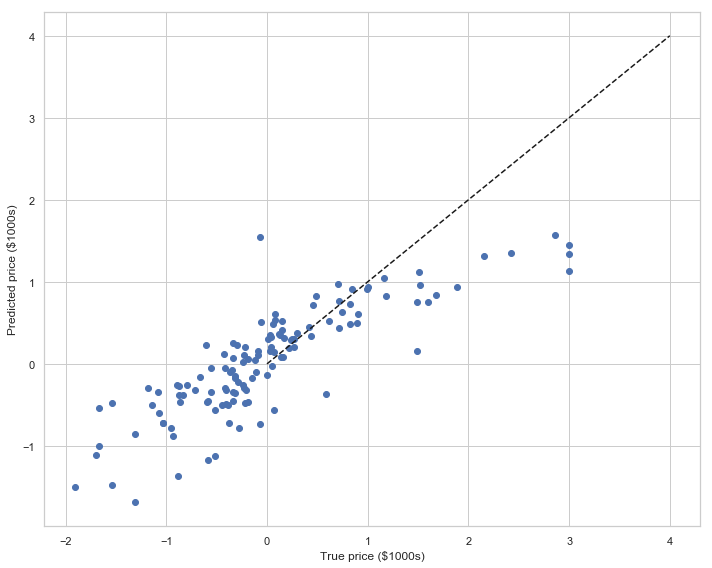

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target)
clf = Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    random_state = RANDOM_SEED)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(10, 8))
plt.scatter(expected, predicted)
plt.plot([0, 4], [0, 4], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()

RMS: 0.5751715541039669 


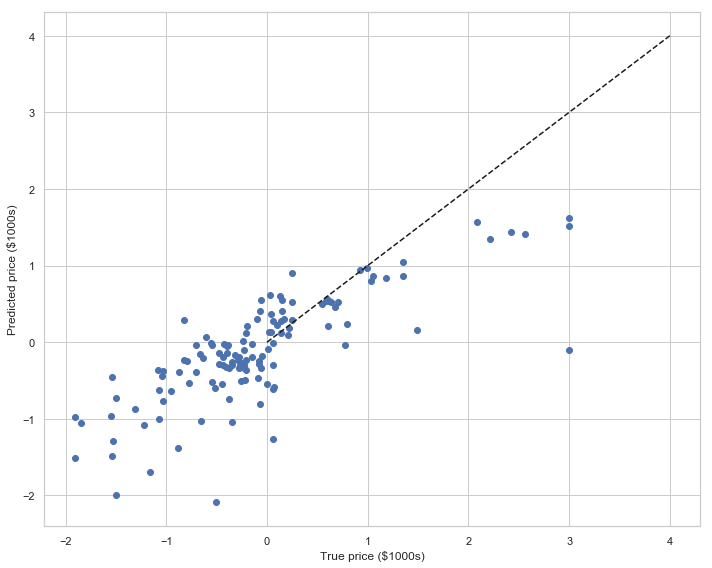

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, target)


ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                         max_iter=10000, tol=0.01, 
                         fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = False, 
                         random_state = RANDOM_SEED)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(10, 8))
plt.scatter(expected, predicted)
plt.plot([0, 4], [0, 4], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()


RMS: 0.368196461229181 


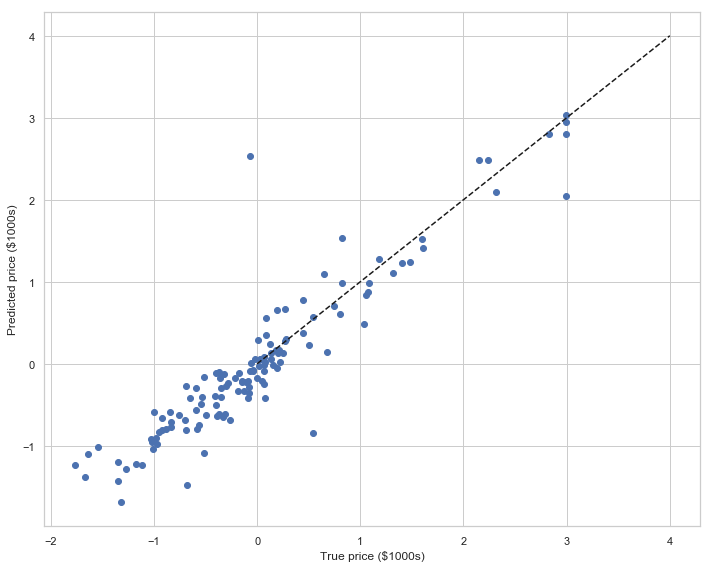

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(10, 8))
plt.scatter(expected, predicted)
plt.plot([0, 4], [0, 4], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()

In [83]:
X = model_data[:,0]
y = np.delete(model_data, 0, axis=1)

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

In [84]:
print(__doc__)

# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets





# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, Y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

Automatically created module for IPython interactive environment


NameError: name 'Y' is not defined

In [1]:
# Import supplementary visualizations code visuals.py
import visuals as vs

# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(data, target)

NameError: name 'data' is not defined

In [32]:
features =prelim_model_data[:,-0]
features
#boston_input.head()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 22.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.2, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

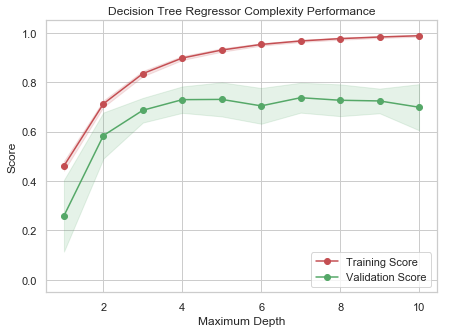

In [12]:
vs.ModelComplexity(X_train, y_train)

In [ ]:
# TODO: Create a decision tree regressor object
regressor = DecisionTreeRegressor()